Section1: Business Understanding
    In this project, Stack Overflow Developer Survey, 2017 is chosen as the dataset and to focus to the following questions:
    Question 1:what are the first 4 countries in which the survey was done?
    Question 2:what is the distribution of professional occupations in the above 4 countries?
    Question 3:What is the percentage of good rating for StackOverFlow?

In [7]:

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Section2 :Data Understanding

 **Gather data**

In [8]:
# Read the file
df=pd.read_csv('survey-results-public.csv')
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


**Assess**

In [9]:
# Check rows,columns
df.shape

(51392, 154)

In [10]:
#show data types and count per category
df.dtypes.value_counts()

object     147
float64      6
int64        1
dtype: int64

In [11]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [12]:
#Below we see the number of missing values in each column so as to know how we are going tohandle later 
df.isnull().sum().sort_values(ascending=False)

ExCoder10Years        50475
ExCoderNotForMe       50471
ExCoderWillNotCode    50470
ExCoderReturn         50469
ExCoderBalance        50469
                      ...  
University                0
Country                   0
ProgramHobby              0
Professional              0
Respondent                0
Length: 154, dtype: int64

In [13]:
# check for nulls in order to handle them later

df['StackOverflowSatisfaction'].value_counts(dropna=False)

NaN     14800
8.0     10227
9.0      9792
10.0     9166
7.0      4724
6.0      1456
5.0       716
4.0       202
3.0       162
2.0        73
1.0        38
0.0        36
Name: StackOverflowSatisfaction, dtype: int64

Section3: data preparation

**Clean**

In [14]:
#drop columns - we keep only the relavant columns for our analysis

col_drop=['Respondent','ProgramHobby','HomeRemote','YearsProgram','YearsCodedJob','YearsCodedJobPast','DeveloperType','WebDeveloperType','MobileDeveloperType',
'NonDeveloperType','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years','ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode',
'ExCoderActive','ProblemSolving','BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers',
'RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld','JobSeekingStatus',
'HoursPerWeek','LastNewJob','AssessJobIndustry','AssessJobRole','AssessJobExp','AssessJobDept','AssessJobTech','AssessJobProjects','AssessJobCompensation','AssessJobOffice',
'AssessJobCommute','AssessJobRemote','AssessJobLeaders','AssessJobProfDevel','AssessJobDiversity','AssessJobProduct','AssessJobFinances','ImportantBenefits',
'ClickyKeys','JobProfile','ResumePrompted','LearnedHiring','ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource',
'ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone','Currency',
'Overpaid','TabsSpaces','EducationImportant','EducationTypes','SelfTaughtTypes','TimeAfterBootcamp','CousinEducation','WorkStart','HaveWorkedLanguage','WantWorkLanguage',
'HaveWorkedFramework','WantWorkFramework','HaveWorkedDatabase','WantWorkDatabase','HaveWorkedPlatform','WantWorkPlatform','IDE','AuditoryEnvironment','Methodology',
'VersionControl','CheckInCode','ShipIt','OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication','CollaborateRemote',
'MetricAssess','EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage','EquipmentSatisfiedRW','InfluenceInternet',  
'InfluenceWorkstation','InfluenceHardware','InfluenceServers','InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud','InfluenceConsultants',
'InfluenceRecruitment','InfluenceCommunication','HighestEducationParents','Race','SurveyLong','QuestionsInteresting','QuestionsConfusing','InterestedAnswers']
df.drop(col_drop,axis=1,inplace=True)

In [15]:
# check the nulls for the remaining columns in the dataframe
df.isnull().sum().sort_values(ascending=False)

ExpectedSalary                 48826
Salary                         38501
StackOverflowModeration        21263
StackOverflowAdsRelevant       20575
StackOverflowMakeMoney         20330
StackOverflowAdsDistracting    19655
StackOverflowCommunity         18982
StackOverflowWhatDo            18023
StackOverflowMetaChat          17985
StackOverflowJobSearch         17977
StackOverflowCompanyPage       17957
StackOverflowJobListing        17924
StackOverflowAnswer            17836
StackOverflowNewQuestion       17774
StackOverflowBetter            17742
StackOverflowCopiedCode        17483
StackOverflowHelpful           17446
StackOverflowFoundAnswer       17102
Gender                         16345
StackOverflowDevices           16189
StackOverflowSatisfaction      14800
StackOverflowDescribes         14460
CompanyType                    12569
CompanySize                    12470
JobSatisfaction                11016
CareerSatisfaction              8697
MajorUndergrad                  8551
P

**Section4: Evaluation**

In [22]:
# create function for the bar charts.
def plot(index,data,title,xlabel,ylabel):
    '''
    return a bar chart
    input:index=list, data=series
    output: gives us a bar chart
    
    '''
    plt.xticks(rotation='90')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(index,data)

#### Question1:what are the first 4 countries in which the survey was done?

**Analyze**

In [23]:
#To address this question we must find the top 4 countries with the greatest entries,
#and after to visualize to a bar chart
top_4=df['Country'].value_counts(dropna=False).sort_values(ascending=False)[:4]
top_4

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Name: Country, dtype: int64

**Visualise**

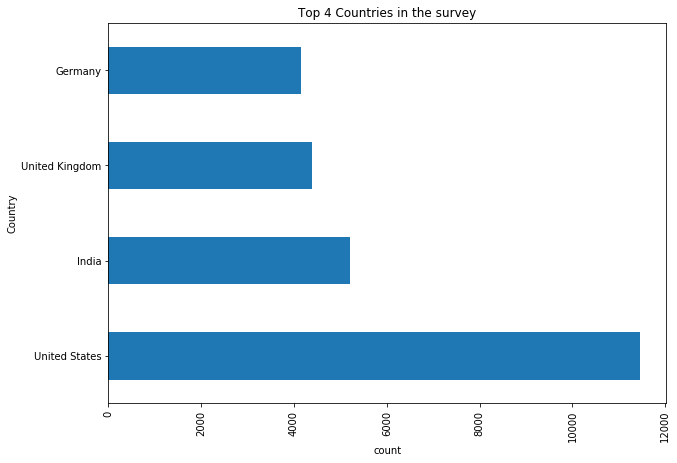

In [24]:
# Plot the above finding with barh.
plt.figure(figsize=(10,7))
top_4.plot(kind='barh')

plt.xticks(rotation='vertical')
plt.title('Top 4 Countries in the survey')
plt.xlabel('count')
plt.ylabel('Country')
plt.savefig("nationalities")

Question 2: what is the distribution of professional occupations in the above 4 countries?

To address this question, we will find how the professions distributes for every country and after we will merge to one visual

**Analyze**

In [25]:
# Find the different categories of profession
df['Professional'].value_counts(dropna=False)

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [26]:
#Create a list in order to use it as index to the visual- bar chart
index=['Professional developer','Student','Professional non-developer who sometimes writes code','Used to be a professional developer','None of these']

**Visualise**

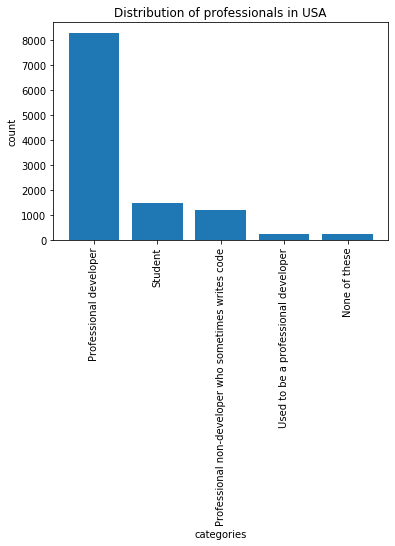

In [28]:
#distribution of Professional in USA
usa=df['Professional'][df['Country']=='United States']
data_usa=usa.value_counts()
plot(index,data_usa,'Distribution of professionals in USA','categories','count')


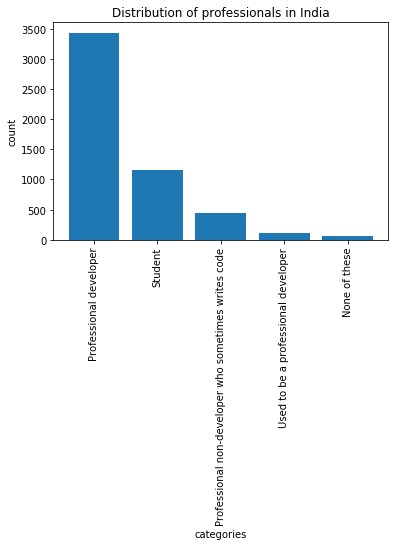

In [30]:
#distribution of Professional and India
india=df['Professional'][df['Country']=='India']
data_india=india.value_counts()
plot(index,data_india,'Distribution of professionals in India','categories','count')


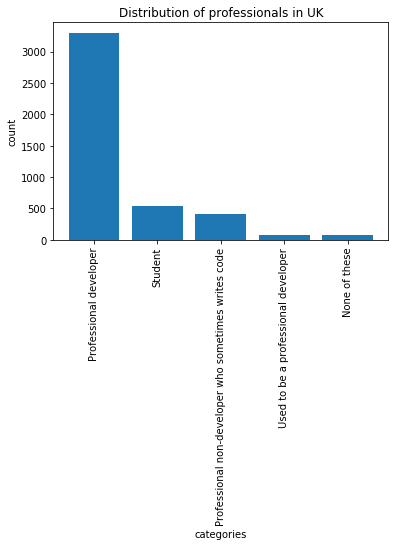

In [31]:
#distribution of Professional and United Kingsom
uk=df['Professional'][df['Country']=='United Kingdom']
data_uk=uk.value_counts()
plot(index,data_uk,'Distribution of professionals in UK','categories','count')

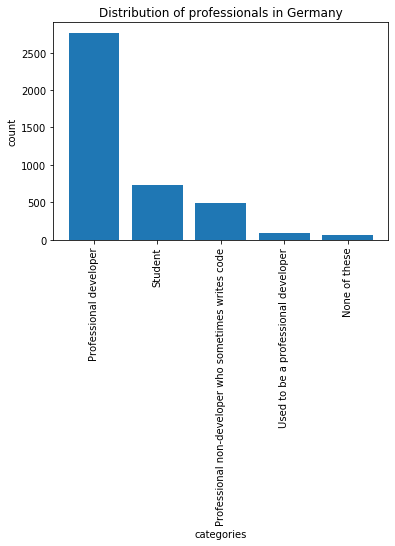

In [32]:
#distribution of Professional and Germany
ger=df['Professional'][df['Country']=='Germany']
data_ger=ger.value_counts()
plot(index,data_ger,'Distribution of professionals in Germany','categories','count')

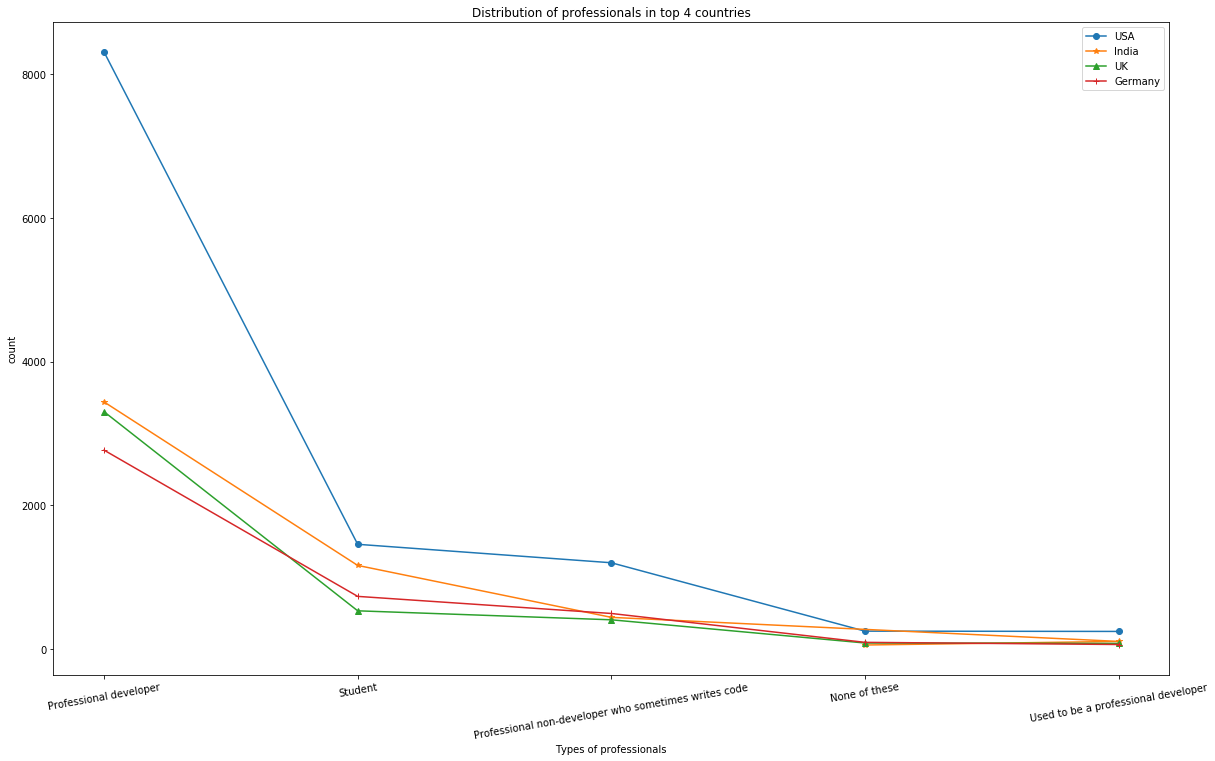

In [33]:
# Here we merge all distributions to one visual in order to compare more easily
plt.figure(figsize=(20,12))
plt.plot(data_usa,label='USA',marker='o')
plt.plot(data_india,label='India',marker='*')
plt.plot(data_uk,label='UK',marker='^')
plt.plot(data_ger,label='Germany',marker='+')

plt.xticks(rotation='10')
plt.title('Distribution of professionals in top 4 countries')
plt.xlabel('Types of professionals')
plt.ylabel('count')
plt.legend()
plt.savefig("distribution")
plt.show()

**Explanation**

Outcome: As we can see from the above picture, USA always has more people in every category using stackoverflow especially professional developers.

Question 3:What is the percentage of good rating for StackOverFlow?

**Analyze**

To address this question, we will handle nulls if exist and after we will make an assuption about what is good rating,
in order to find the good rating records and to divide with the total rows of the dataset.

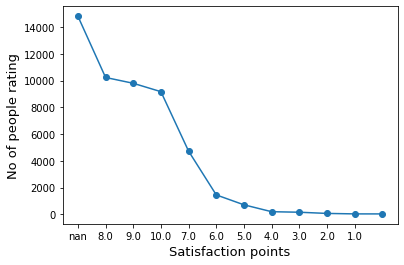

In [34]:
# we have many nulls, so we replace them with no applicaple -another category, we can fill with the mean but it will 
# skew our results. Nulls means I forgot to write points or I am not satisfy so we are not sure.
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'].astype('str')
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'].fillna('n/a')

satisf=df['StackOverflowSatisfaction'].value_counts()
xtick=np.arange(0,11,1)
plt.xticks(xtick)
plt.xlabel('Satisfaction points',fontsize='13')
plt.ylabel('No of people rating',fontsize='13')
plt.plot(satisf, marker='o')

In [35]:
# we keep only the pure grades and cast them to float so as to compare with a number
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'][df['StackOverflowSatisfaction']!='n/a'].astype('float')

In [36]:
# keep the good grades(grades>6.0)
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'][df['StackOverflowSatisfaction']>6.0]

In [37]:
# count the good evaluation
df['StackOverflowSatisfaction'].count()

33909

In [38]:
# find the percentage for good evaluation
perc=df['StackOverflowSatisfaction'].count()/df.shape[0]
perc

0.6598108655043586

**Explanation**

The 66% of the people have good comments for stackoverflow.

In [39]:
### Final Results

From the above analysis we conclude:
    1.United States has by far the biggest percentage of entries in this survey.
    2.USA always has more people in every category using stackoverflow especially professional developers.
    3.The 66% of the people have good comments for stackoverflow.(although this perc may be greater 
                                                                  if we did not have nuulls in evaluation.)